## Abstract
A blog post about cOverfitting, Overparameterization, and Double Descent
. We we ill be going int othis.

### Part 0
In Equation 1, the equation $(X^T X)^{-1}$ requires for $X^T X$ to be invertible. And this can only happen when the number of data points $n$ is greater than or equal to the number of features $p$. So if we have $p > n$, then $X^T X$ becomes a singular matrix and it doesn’t have full rank( meaning it cant be inverted then)so our formula wont work.

### Part A
In my LY.py file I created a regression model called MyLinearRegression that predicts outputs and calculates the mean-squared error loss. I also implemented an optimizer OverParameterizedLinearRegressionOptimizer that fits the model using the pseudoinverse. This allows the model to work even in the overparameterized setting, when our traditional matrix inversion is not possible.



In [3]:
# Import our libraries
%load_ext autoreload
%autoreload 2
from LR import MyLinearRegression, OverParameterizedLinearRegressionOptimizer
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Part B
In the code below, I generated a 1D dataset. I also created a randmon features class to apply a random feature transformation to make the data linearly separable in the new feature space, and then I will fit my linear regression model to this transfomed data.

In [4]:

# creating 1d data
X = torch.tensor(np.linspace(-3, 3, 100).reshape(-1, 1), dtype=torch.float64)
y = X**4 - 4*X + torch.normal(0, 5, size=X.shape)

#Define square activation
def square(x):
    return x**2

# Creating a RandomFeatures class to generate random features
class RandomFeatures:
    def __init__(self, n_features, activation=square):
        self.n_features = n_features
        self.activation = activation
        self.u = None
        self.b = None

    def fit(self, X):
        self.u = torch.randn((X.size(1), self.n_features), dtype=torch.float64)
        self.b = torch.rand((self.n_features), dtype=torch.float64)

    def transform(self, X):
        return self.activation(X @ self.u + self.b)


I will now transorm our features and fit our model based of teh model we created. I then did teh predictions and plotted a graph to view it.

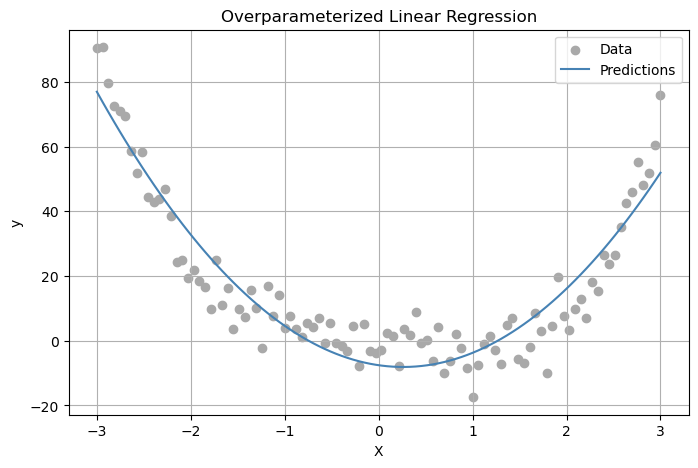

In [6]:

# trnasform our features and fit model
phi = RandomFeatures(n_features=300, activation=square)
phi.fit(X)

X_phi = phi.transform(X)

model = MyLinearRegression()
opt = OverParameterizedLinearRegressionOptimizer(model)
opt.fit(X_phi, y)

# making our prediction and plotting them
y_pred = model.predict(X_phi).detach()

plt.figure(figsize=(8, 5))
plt.scatter(X.numpy(), y.numpy(), color='darkgrey', label='Data')
plt.plot(X.numpy(), y_pred.numpy(), color='steelblue', label='Predictions')
plt.title("Overparameterized Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In our graph about our plot shows that the model gets the general trend of the data very well. Despite the noise in the data, the predictions (which is the blue line) follow the overall U-shaped curve, which matches the true underlying function. This tell us that the random feature mapping allowed the linear model to learn a nonlinear relationship. This showse that our overparameterized linear regression setup is working well.